In [1]:
from stereo3d import stereo3d_read_from_zips as std_read
from parsivel import pars_read_from_zips as pars_read
from multifractal_analysis import spectral_analysis, dtm_analysis, fractal_dimension_analysis, tm_analysis
from multifractal_analysis.general import fluctuations
from multifractal_analysis.general import split_field
from matplotlib import pyplot as plt
import numpy as np 
from pathlib import Path
pars_datafolder = Path("/home/marcio/stage_project/data/Pars_1/")
stereo_datafolder = Path("/home/marcio/stage_project/data/Daily_raw_data_3D_stereo/")
beg = 20230821000000
end = 20231022235959

ImportError: cannot import name 'get_best_slice' from 'multifractal_analysis.general' (/home/marcio/stage_project/mytoolbox/multifractal_analysis/general.py)

### Read the parsivel and stereo 3D data

In [2]:
# Read the main parsivel series
parsivel_rain_rate = pars_read(beg, end, pars_datafolder).rain_rate
stereo_rain_rate = std_read(beg, end, stereo_datafolder).rain_rate()

### Put both arrays in the format

In [17]:
stereo3d_field = split_field(stereo_rain_rate, 7) 
parsivel_field = split_field(parsivel_rain_rate, 7)/ np.mean(stereo_rain_rate)
stereo3d_field.shape, parsivel_field.shape

((128, 157), (128, 126))

Do the Analisys for each device

In [1]:
figure = plt.figure()
figure.set_size_inches((20,10))
axs = [figure.add_subplot(2,3,i + 1) for i in range(5)]

# Fractal dimension Analysis
df_result = fractal_dimension_analysis(parsivel_field, axs[0])

# Spectral Analysis
spectral_result = spectral_analysis(parsivel_field, axs[1])

# TM
#tm_result = tm_analysis(parsivel_field, axs[2])

# DTM
dtm_result = dtm_analysis(parsivel_field, axs[3], axs[4])


NameError: name 'plt' is not defined

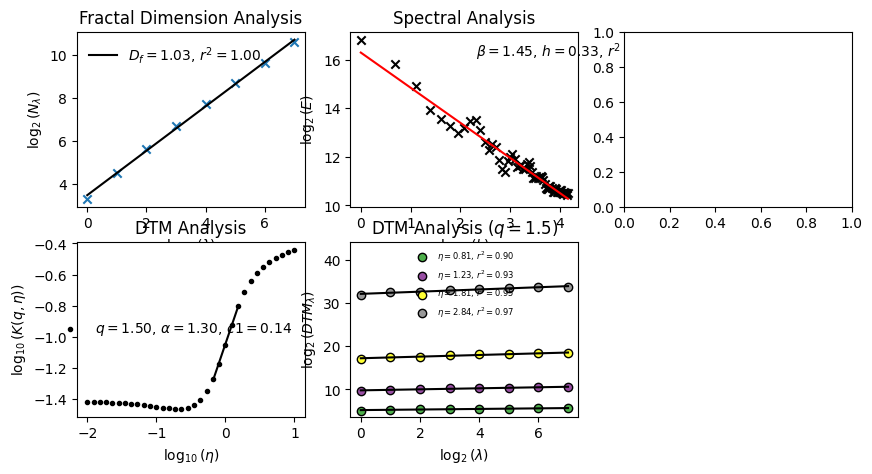

In [19]:
figure = plt.figure()
figure.set_size_inches((10,5))
axs = [figure.add_subplot(2,3,i + 1) for i in range(5)]

# Fractal dimension Analysis
df_result = fractal_dimension_analysis(stereo3d_field, axs[0])

# Spectral Analysis
spectral_result = spectral_analysis(parsivel_field, axs[1])

# TM
#tm_result = tm_analysis(parsivel_field, axs[2])

# DTM
dtm_result = dtm_analysis(parsivel_field, axs[3], axs[4])


#### Do the same for fluctuations

In [20]:
stereo3d_fluctuations = stereo3d_field
parsivel_fluctuations = parsivel_field
for i in range(stereo3d_field.shape[1]):
    stereo3d_fluctuations[:, i] = fluctuations(stereo3d_field[:, i])

for i in range(parsivel_field.shape[1]):
    parsivel_fluctuations[:, i] = fluctuations(parsivel_field[:, i])

In [24]:
np.max(parsivel_field)

1436.5587119424652

/home/marcio/stage_project/mytoolbox/multifractal_analysis/fractal_dimension.py:32: RuntimeWarning: divide by zero encountered in log2
  x[i], y[i] = log2(lamb), log2(boxcount)


ValueError: Input y contains infinity or a value too large for dtype('float64').

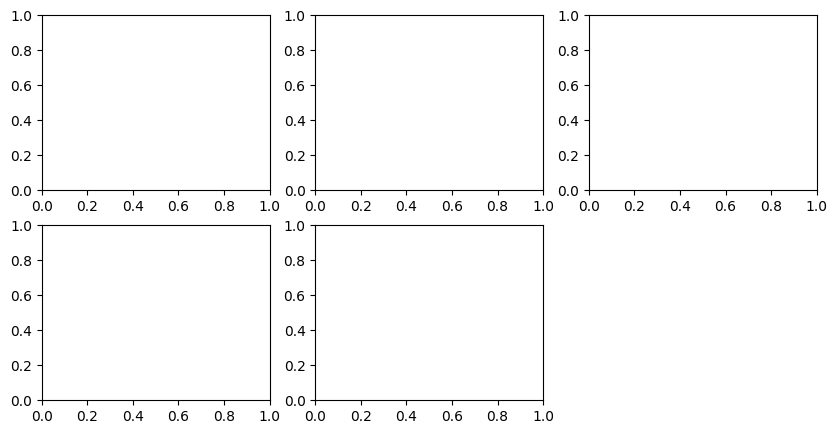

In [21]:
figure = plt.figure()
figure.set_size_inches((10,5))
axs = [figure.add_subplot(2,3,i + 1) for i in range(5)]

# Fractal dimension Analysis
df_result = fractal_dimension_analysis(stereo3d_field, axs[0])

# Spectral Analysis
spectral_result = spectral_analysis(parsivel_field, axs[1])

# TM
#tm_result = tm_analysis(parsivel_field, axs[2])

# DTM
dtm_result = dtm_analysis(parsivel_field, axs[3], axs[4])
